In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Get the current working directory
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

# Construct the path to the src directory
src_dir = os.path.abspath(os.path.join(current_dir, '..', ''))
print(f"Source directory: {src_dir}")

# Add the src directory to the Python path
sys.path.append(src_dir)

# List the contents of the src directory to verify core is present
print(f"Contents of src directory: {os.listdir(src_dir)}")

# List the contents of the core directory to verify config.py is present
core_dir = os.path.join(src_dir, 'core')
print(f"Contents of core directory: {os.listdir(core_dir)}")

# Import the Config class from core.config
try:
    from core.config import Config
    print("Successfully imported Config from core.config")
except ModuleNotFoundError as e:
    print(f"Error: {e}")

from core.config import Config
import pickle

Current directory: /Users/sultandaniels/Documents/Transformer_Kalman/mop_modifications/streamlined_mop/src/training_convergence_notebooks
Source directory: /Users/sultandaniels/Documents/Transformer_Kalman/mop_modifications/streamlined_mop/src
Contents of src directory: ['datasources', 'training_convergence_notebooks', '.DS_Store', 'core', 'create_plots_with_zero_pred.py', 'export_state_dict.py', 'log_log_fit.py', 'utils', 'garg_reproduce.ipynb', 'models', '__pycache__', 'ganguli_rep.py', 'check_system.py', 'hard_code_generation_playground.ipynb', 'system', '.gitignore', 'configs', 'train.py', 'data_train.py', 'dyn_models', 'collect_data.py', 'infrastructure', 'noisy_exp_decay.ipynb', 'wandb', 'check_ecdf.py']
Contents of core directory: ['config.py', '__init__.py', '__pycache__', 'training.py']
Successfully imported Config from core.config


In [34]:
def plot_train_conv(t, ax, error_checkpoints_tuples, y_values, x_values, ts, sys, yax, xax, rem, dist_string):


    ax[t][sys].plot(x_values, y_values, marker='o', label=dist_string)

    # ax[t][sys].plot(x_values, fitted_y_values_opt - subtract, label="Regularized Fit y-s = e^b*x^a, a=%g, b=%g, c=%g, s=%g" % (a_opt, b_opt, c_opt, subtract))

    if yax == "log":
        # set y-axis to log scale
        ax[t][sys].set_yscale('log')
    if xax == "log":
        # set x-axis to log scale
        ax[t][sys].set_xscale('log')

    ax[t][sys].set_title("System " + str(sys) + ": t = " + str(ts[t]))
    ax[t][sys].set_xlabel("Checkpoint Step")
    ax[t][sys].set_ylabel("Error")

    # add a legend 
    ax[t][sys].legend()

    return ax

def save_figure(fig, config, yax, xax, subtracted, err=False, ratios=False, cdf=False, eval_start=None):
    
    fig.text(0.5, 0, "The error bars are 3*std.", ha='center', va='bottom', fontsize=12)
    # Adjust layout to make room for the rotated x-axis labels
    plt.tight_layout()
    #get the parent directory of the ckpt_path
    parent_dir = os.path.dirname(config.ckpt_path)

    #get the parent directory of the parent directory
    parent_parent_dir = os.path.dirname(parent_dir)
    os.makedirs(parent_parent_dir + "/figures", exist_ok=True)
    fig.savefig(parent_parent_dir + f"/figures/{config.dataset_typ}" + config.C_dist + "_system_conv_checks" + ("_KF_normalized" if kfnorm else ("_OLS_normalized" if olsnorm else "")) + ("_subtracted" if subtracted else "") + ("_ylog" if yax == "log" else "") + ("_xlog" if xax == "log" else "") + ("_fit_err" if err else "") + ("_dummy_ratios" if ratios else "") + ("_cdf" if cdf else "") + ("_" + str(eval_start) if eval_start else "")+ ".png")
    return None

def save_figure_c(fig, config, kfnorm, olsnorm, yax, xax, subtracted):
    
    fig.text(0.5, 0, "The error bars are 3*std.", ha='center', va='bottom', fontsize=12)
    # Adjust layout to make room for the rotated x-axis labels
    plt.tight_layout()
    #get the parent directory of the ckpt_path
    parent_dir = os.path.dirname(config.ckpt_path)

    #get the parent directory of the parent directory
    parent_parent_dir = os.path.dirname(parent_dir)
    os.makedirs(parent_parent_dir + "/figures", exist_ok=True)
    fig.savefig(parent_parent_dir + f"/figures/{config.dataset_typ}" + config.C_dist + "_find_opt_c" + ("_KF_normalized" if kfnorm else ("_OLS_normalized" if olsnorm else "")) + ("_subtracted" if subtracted else "") + ("_ylog" if yax == "log" else "") + ("_xlog" if xax == "log" else "") + ".png")
    return None



Plotting error_checkpoints_tuples


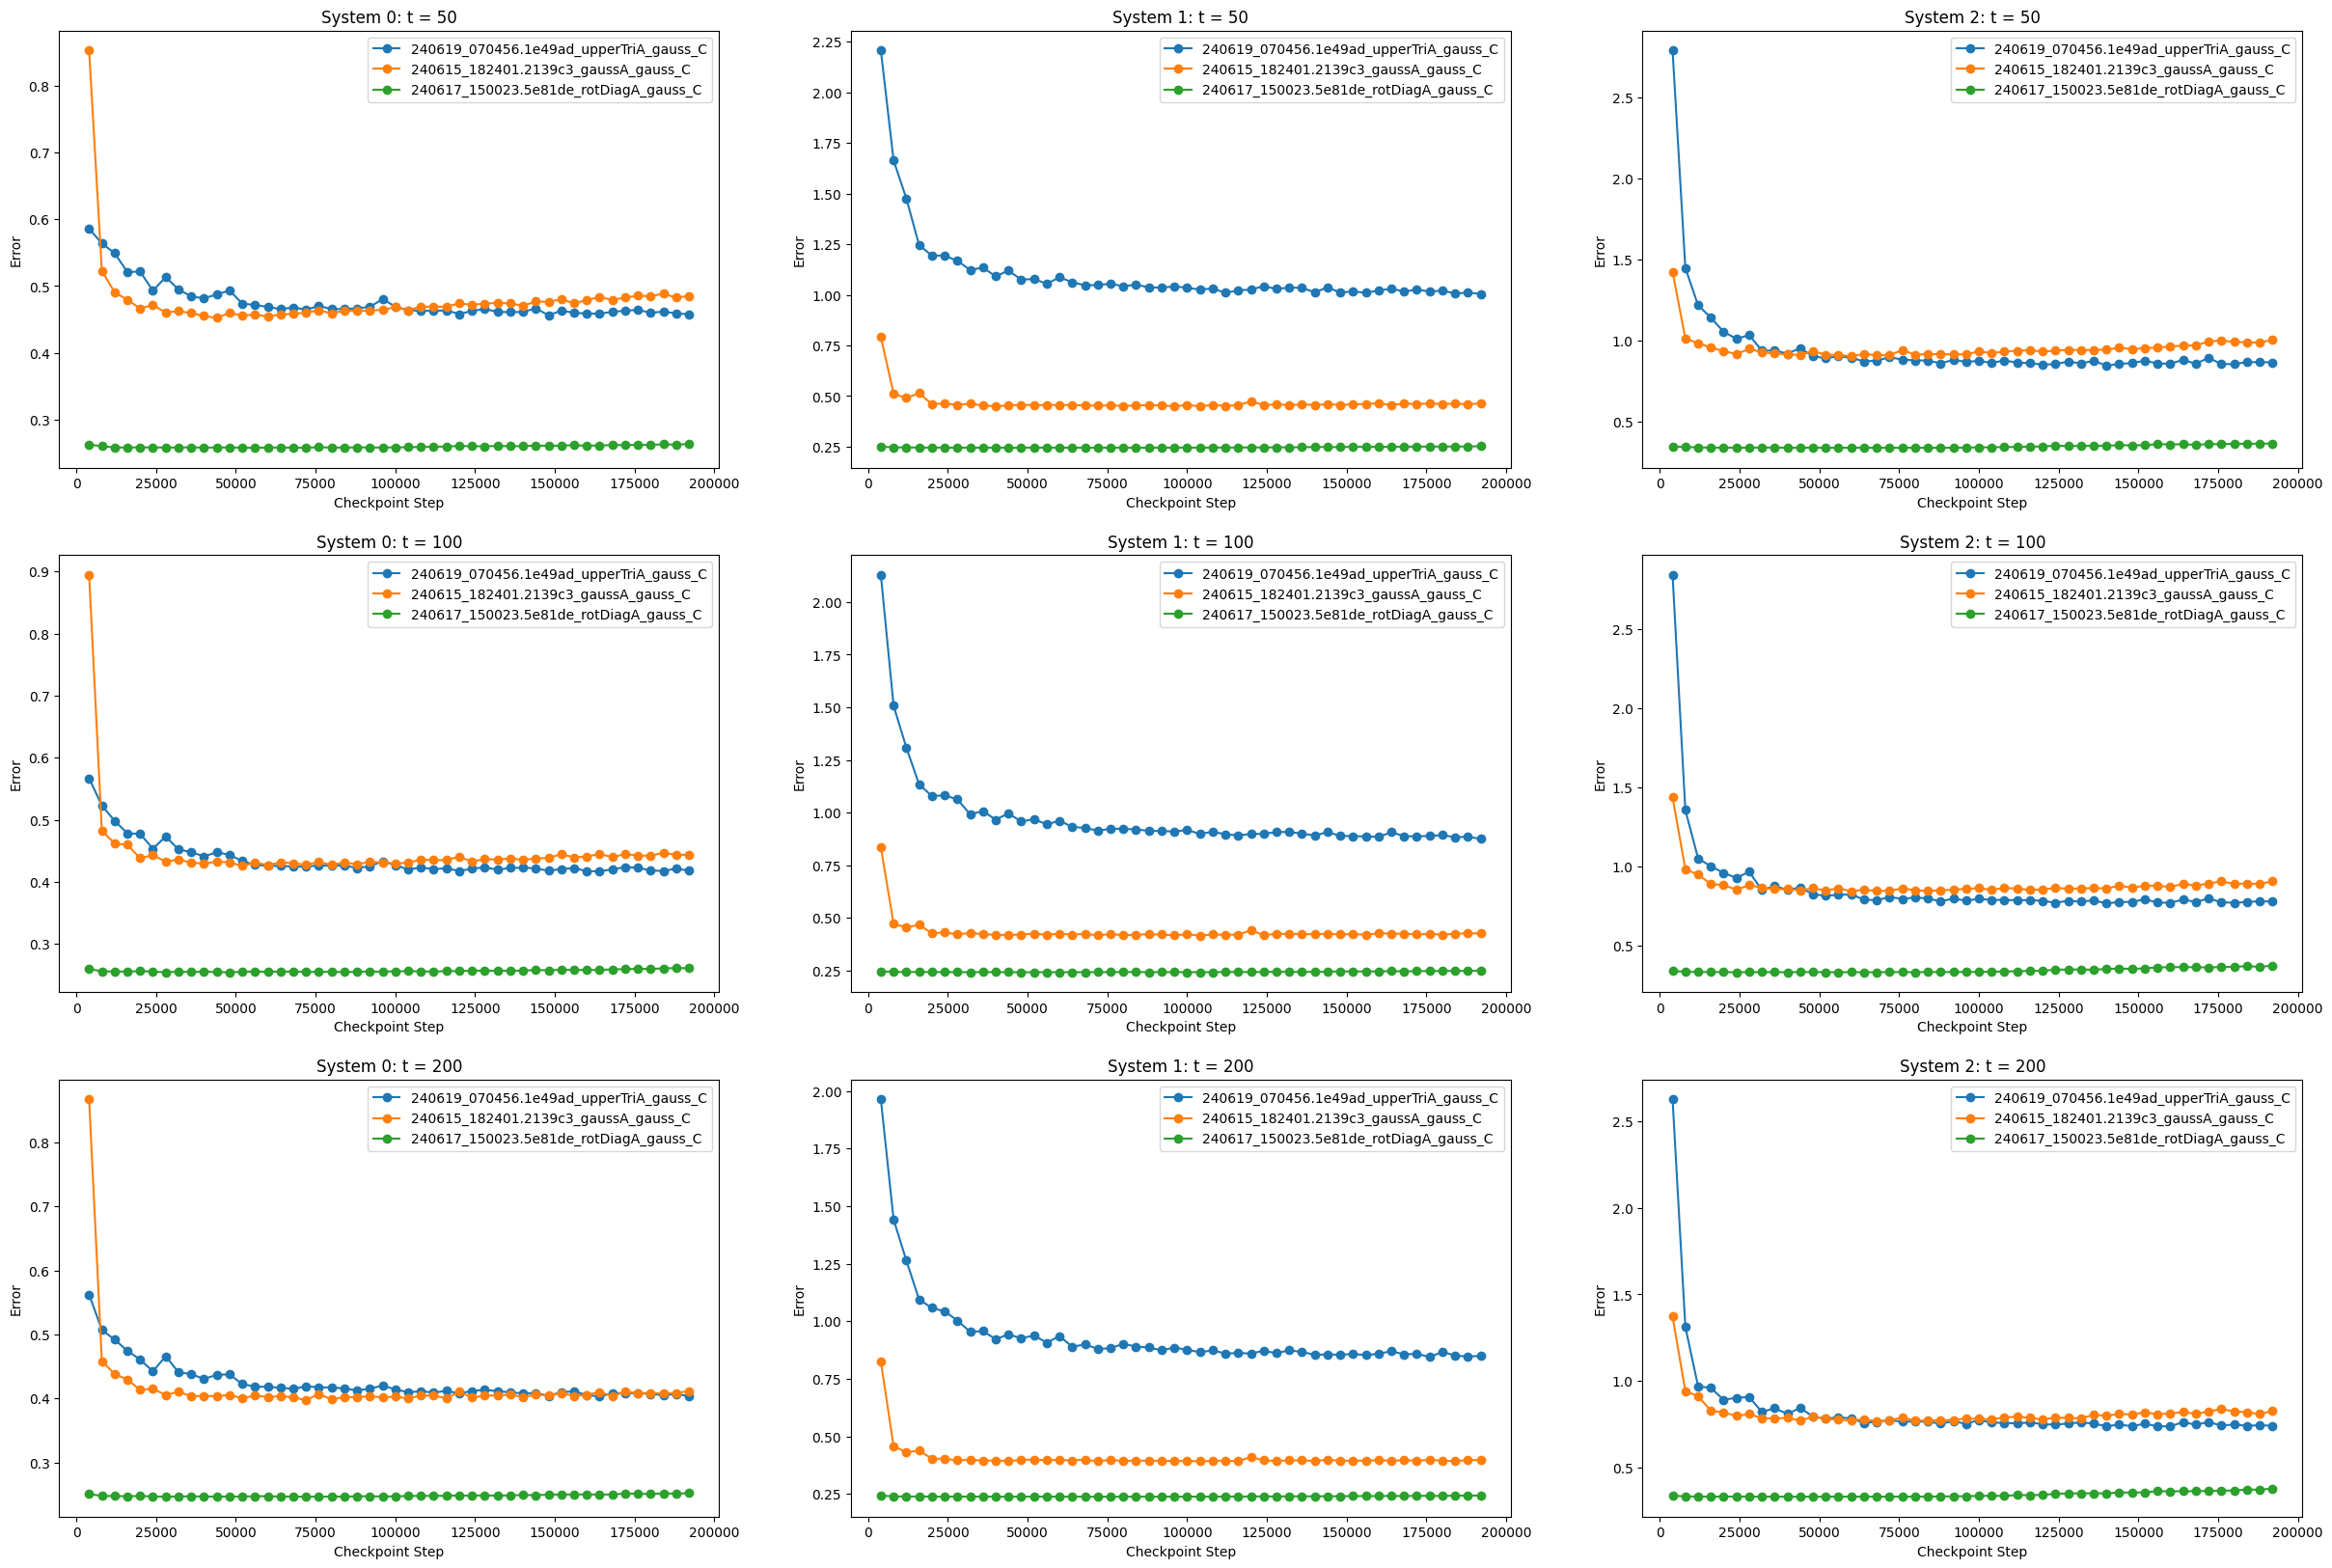

In [58]:
dists_strings = ["240619_070456.1e49ad_upperTriA_gauss_C", "240615_182401.2139c3_gaussA_gauss_C", "240617_150023.5e81de_rotDiagA_gauss_C"]

config = Config()

num_val_tasks = 3
ts = [50,100,200]
#plot the error_checkpoints_tuples
print("\n\nPlotting error_checkpoints_tuples")
#make a new figure
fig, ax = plt.subplots(len(ts), num_val_tasks, figsize=(30, 20))

# set the axis scaling
yax = "lin"
xax = "lin"

for dist_string in dists_strings:
    #load sys_error_checkpoints_tuples from a pickle file
    with open("/Users/sultandaniels/Documents/Transformer_Kalman/outputs/GPT2/"+ dist_string + "/train_conv/sys_error_checkpoints_tuples.pkl", "rb") as f:
        sys_error_checkpoints_tuples = pickle.load(f)

    #load sys_error_an_checkpoints_tuples from a pickle file
    with open("/Users/sultandaniels/Documents/Transformer_Kalman/outputs/GPT2/" + dist_string + "/train_conv/sys_error_an_checkpoints_tuples.pkl", "rb") as f:
        sys_error_an_checkpoints_tuples = pickle.load(f)


    for sys in range(num_val_tasks):
        # Filter bairand transform sys_error_checkpoints_tuples for the current system sys
        error_checkpoints_tuples = [(str(x[0]), x[1][sys]) for x in sys_error_checkpoints_tuples if isinstance(x[1], list) and len(x[1]) > sys]

        error_checkpoints_an_tuples = [(str(x[0]), x[1][sys]) for x in sys_error_an_checkpoints_tuples if isinstance(x[1], list) and len(x[1]) > sys]
        
        #sort the error_checkpoints_tuples by the step
        error_checkpoints_tuples = sorted(error_checkpoints_tuples, key=lambda x: int(x[0]))

        error_checkpoints_an_tuples = sorted(error_checkpoints_an_tuples, key=lambda x: int(x[0]))

        #make a plot for each value of t in ts for each system
        for t in range(len(ts)):
            #create an error dictionary with the key being the name of the fit and the value being an empty list

            # Ensure that the indices are valid before accessing them
            try:
                y_an_values = [x[1][t][0] for x in error_checkpoints_an_tuples]
            except IndexError as e:
                print(f"IndexError: {e}")
                print(f"Error occurred at t={t} with error_checkpoints_an_tuples={error_checkpoints_an_tuples}")
                raise

            x_values = [float(x[0]) for x in error_checkpoints_tuples]

            #set the y_values to be the error
            y_values = [x[1][t][0] for x in error_checkpoints_tuples]

            #analytical
            # y_an_values = [x[1][t][0] for x in error_checkpoints_an_tuples]
            
            #keep only the first rem elements of x_values and y_values
            rem = int(np.ceil(len(x_values)/2))
            eval_start = len(x_values) - 1 #set eval_start to the last element of x_values

            ax = plot_train_conv(t, ax, error_checkpoints_tuples, y_values, x_values, ts, sys, yax=yax, xax=xax, rem=rem, dist_string=dist_string)

            
            # #analytical
            # ax[t][sys].plot(x_values, yfit_optc_an-subtract, label="Least Squares Optimal Analytical c=%g, a=%g, b=%g" % (c_vals_an[min_err_lin_idx], a_vals_an[min_err_lin_idx], b_vals_an[min_err_lin_idx]), linestyle='--')

            ax[t][sys].legend()

            # #analytical
            # ax2[t][sys].plot(x_values, yfit_optc_an, label="Least Squares Optimal Analytical c=%g, a=%g, b=%g" % (c_vals[min_err_lin_idx], a_vals[min_err_lin_idx], b_vals[min_err_lin_idx]), linestyle='--')



In [59]:
#create a directory in the GPT2 directory named train_conv_figures_compare_dists
os.makedirs("/Users/sultandaniels/Documents/Transformer_Kalman/outputs/GPT2/train_conv_figures_compare_dists", exist_ok=True)
fig.savefig("/Users/sultandaniels/Documents/Transformer_Kalman/outputs/GPT2/train_conv_figures_compare_dists/train_conv_compare_dists_" + yax + "_"+ xax + ".png")